# 경사 하강법

우리는 step1에서 간단한 2차원 평면의 x, y에 대해서 정답값인 y에 가깝게 예측하는 연습을 하였다. 3차원에서는 어떻게해야할까? 3차원에서는 단순한 모델로 한번에 가중치를 찾는것은 쉽지 않을것이다. 따라서 우리는 경사 하강법, 즉 손실값이 어떤 가중치에 대해 최소가 되는 구간을 찾아 최소가 되는 지점의 가중치로 업데이트를하는것이다.

gradient란 해당 방향으로의 편미분 값을 계산한것으로, 예를들어 산 정상에서 출발하여, 가장 최소거리로 산을 내려올수있는 방향을 찾아주는 수학적 이론이다. 즉 gradient의 방향으로 가중치를 업데이트한다면, 가장 빠르게 최적의 가중치를 찾고 손실값을 최소로 만들 수 있을것이다. 이는 앞으로 배울 머신러닝에서 가장 핵심적인 내용으로 반드시 익히는거이 좋다.

이번에 다룰 데이터는 좀더 복잡하고 비선형적인 3차원 데이터를 가지고 이용할것이다.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.ticker import LinearLocator
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D
import csv

In [7]:
class MyData:
    def __init__(self):
        pass
    def get_clean_data(self):
        data = np.genfromtxt("./step2_data/point_clean.csv", delimiter = ',')
        return data
    def get_noisy_data(self):
        data = np.genfromtxt("./step2_data/point_noisy.csv", delimiter = ',')
        return data

data = MyData()
point_clean = data.get_clean_data()
point_noisy = data.get_noisy_data()

x_clean = point_clean[0].reshape(20, 20)
y_clean = point_clean[1].reshape(20, 20)
z_clean = point_clean[2].reshape(20, 20)

x_noisy = point_noisy[0].reshape(20, 20)
y_noisy = point_noisy[1].reshape(20, 20)
z_noisy = point_noisy[2].reshape(20, 20)

print(x_clean.shape, y_clean.shape, z_clean.shape)
print(x_noisy.shape, y_noisy.shape, z_noisy.shape)

(20, 20) (20, 20) (20, 20)
(20, 20) (20, 20) (20, 20)


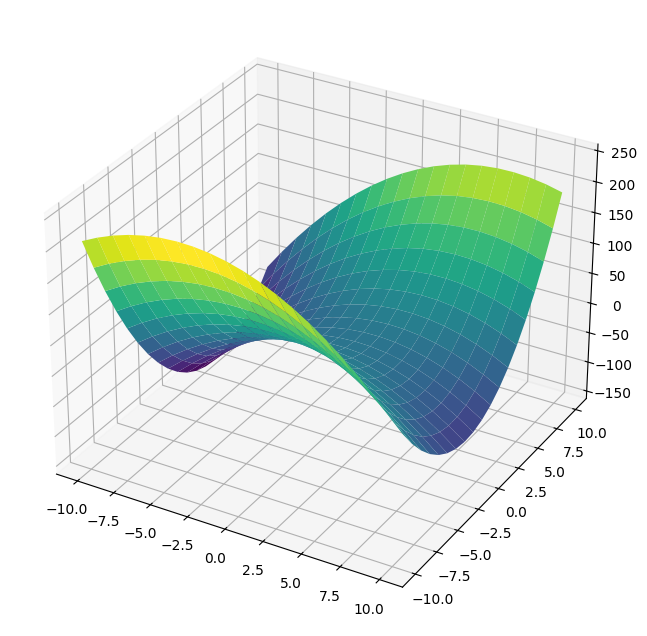

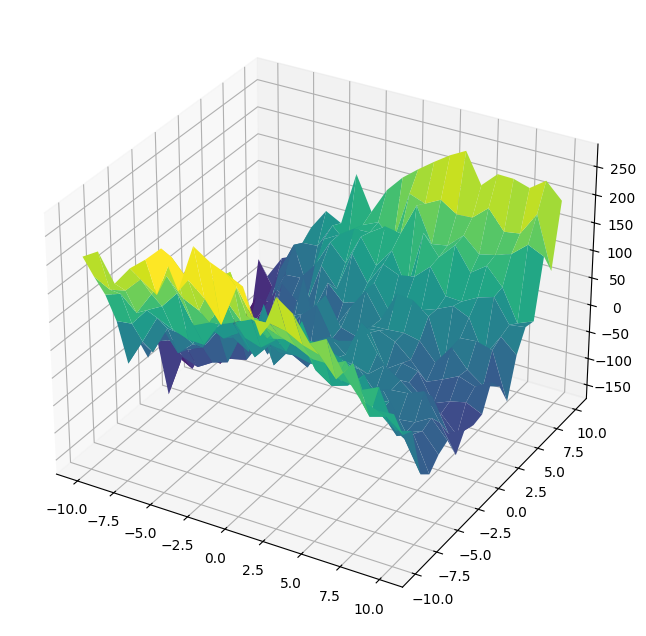

In [11]:
class MyPlot:
    def __init__(self):
        self.figsize = (8,8)

    def plot_surface(self, x, y, z):
        fig = plt.figure(figsize = self.figsize)
        ax = fig.add_subplot(projection = '3d')
        surf = ax.plot_surface(x, y, z, cmap = 'viridis')
        plt.show()
        pass

plot = MyPlot()
plot.plot_surface(x_clean, y_clean, z_clean)
plot.plot_surface(x_noisy, y_noisy, z_noisy)
